# Quality Report - FORCE Met Tower dataset

## Correctly loading in the CSV file data columns
Loading into a pandas dataframe first required manually setting each of the datatypes so pandas wouldn't guess the type.


In [1]:
import pandas as pd
import datetime as dt
import netCDF4 as nc
import matplotlib
from datetime import datetime
from erddapy import ERDDAP
import certifi
import wincertstore

# Forcing strict datatypes to be assigned to each column in the dataframe
types = {'StationID':int, 'time':str, 'longitude':float, 'latitude':float, 'battery_voltage':float,
       'air_temperature':float, 'solar_irradiance':float, 'relative_humidity':float, 'Manual_BP':int,
       'wind_speed':float, 'air_potential_temperature':float, 'wind_speed_15min_max':float, 'Prog_Sig':int,
       'air_pressure':float, 'solar_irradiance_raw':float,
       'wind_speed_2min_max':float, 'air_pressure_raw':float, 'Rain_mm':float,
       'wind_from_direction_15min_average':float, 'air_temperature_1min_max':float,
       'wind_from_direction':float, 'wind_speed_15min_median':float,
       'wind_speed_15min_average':float}

# Assigning column names
column_names = ['StationID', 'time', 'longitude', 'latitude', 'battery_voltage',
       'air_temperature', 'solar_irradiance', 'relative_humidity', 'Manual_BP',
       'wind_speed', 'air_potential_temperature', 'wind_speed_15min_max',
       'Prog_Sig', 'air_pressure', 'solar_irradiance_raw',
       'wind_speed_2min_max', 'air_pressure_raw', 'Rain_mm',
       'wind_from_direction_15min_average', 'air_temperature_1min_max',
       'wind_from_direction', 'wind_speed_15min_median',
       'wind_speed_15min_average', 'Elevation_Correction', 'elevation']

### Loading dataset from ERDDAP into pandas

#### Note on pattern datatypes:
```int, string, float, float, float, float, float, float, int, float, float, float, int, float, float, float, float, int, float, float, float, float, float, float, float```

In [2]:
# Creating the erddapy object and downloading a fresh CSV file from ERDDAP into a dataframe
e = ERDDAP(server="https://cioosatlantic.ca/erddap",)
e.protocol = "tabledap"
e.dataset_id = "force_meteorological_tower"
e.response = "csv"

url = e.get_download_url()
df_csv = pd.read_csv(url, dtype=types, header=0, skiprows=2, names=column_names)

### Confirming data types are correct.

In [3]:
# This step is needed in confirming the datatypes and properly loading data into the pandas dataframe.
# df_csv.dtypes

### Inspecting the top few rows of data
Looking at the beginning of the data we can see they are updating roughly every 15 minutes. This is important info as we describe the values later in the notebook.

In [4]:
df_csv.head(5)

StationID                  time  longitude  latitude  battery_voltage  \
0       1156  2016-12-09T14:19:23Z    -64.403   45.3713         13.24182   
1       1156  2016-12-09T14:34:23Z    -64.403   45.3713         13.24734   
2       1156  2016-12-09T14:49:23Z    -64.403   45.3713         13.23076   
3       1156  2016-12-09T15:04:23Z    -64.403   45.3713         13.21419   
4       1156  2016-12-09T15:19:23Z    -64.403   45.3713         13.21419   

   air_temperature  solar_irradiance  relative_humidity  Manual_BP  \
0        -0.990490          0.104737           74.01630          0   
1        -1.024410          0.271738           70.96338          0   
2        -0.854805          0.195477           68.82634          0   
3        -0.617355          0.218138           69.40301          0   
4        -0.922649          0.142361           70.01358          0   

   wind_speed  ...  wind_speed_2min_max  air_pressure_raw  Rain_mm  \
0      3.8416  ...                4.900         1000.1650      0.0   
1      6.2132  ...                6.390         1000.1650      0.0   
2      3.4496  ...               10.190         1000.1650      0.0   
3      7.3892  ...                9.330          999.9866      0.0   
4      7.2324  ...                6.468          999.9866      0.0   

   wind_from_direction_15min_average  air_temperature_1min_max  \
0                                NaN                    -0.990   
1                                NaN                    -0.990   
2                                NaN                    -0.685   
3                                NaN                    -0.448   
4                                NaN                    -0.719   

   wind_from_direction  wind_speed_15min_median  wind_speed_15min_average  \
0             282.2419                      NaN                       NaN   
1             305.6517                      NaN                       NaN   
2             319.5723                      NaN                       NaN   
3             300.2328                      NaN                       NaN   
4             303.0988                      NaN                       NaN   

   Elevation_Correction  elevation  
0               1.80078       25.0  
1               1.80078       25.0  
2               1.80078       25.0  
3               1.80078       25.0  
4               1.80078       25.0  

[5 rows x 25 columns]

### Inspecting the statistics of each column
This includes a raw count of how many rows of data are present, and the typical min/max/median/mean shape of the data.

In [5]:
df_csv.describe()

StationID     longitude      latitude  battery_voltage  \
count   190465.0  1.904650e+05  1.904650e+05    190465.000000   
mean      1156.0 -6.440300e+01  4.537130e+01        13.178732   
std          0.0  2.349487e-10  3.716148e-11         0.292200   
min       1156.0 -6.440300e+01  4.537130e+01        11.698810   
25%       1156.0 -6.440300e+01  4.537130e+01        12.933700   
50%       1156.0 -6.440300e+01  4.537130e+01        13.152880   
75%       1156.0 -6.440300e+01  4.537130e+01        13.359820   
max       1156.0 -6.440300e+01  4.537130e+01        14.307720   

       air_temperature  solar_irradiance  relative_humidity  Manual_BP  \
count    190465.000000     190465.000000      190465.000000   190465.0   
mean          7.075753          0.153984          78.384433        0.0   
std           8.879026          0.256473          15.294390        0.0   
min         -21.369210         -0.000484          17.123540        0.0   
25%           0.495163          0.000000          68.033820        0.0   
50%           7.439823          0.004348          81.015260        0.0   
75%          14.557770          0.202926          91.462010        0.0   
max          30.013530          1.444560         100.273700        0.0   

          wind_speed  air_potential_temperature  ...  wind_speed_2min_max  \
count  190465.000000              190465.000000  ...        190465.000000   
mean        3.386835                   9.955231  ...             4.467208   
std         3.147870                   9.755717  ...             3.673694   
min         0.000000                 -22.095700  ...             0.000000   
25%         1.097600                   2.778652  ...             1.803000   
50%         2.646000                  10.064740  ...             3.724000   
75%         4.704000                  17.513480  ...             6.233000   
max        28.616000                  36.238160  ...            29.420000   

       air_pressure_raw   Rain_mm  wind_from_direction_15min_average  \
count     190465.000000  190465.0                      152449.000000   
mean        1012.300542       0.0                         169.973868   
std            9.588520       0.0                         105.718310   
min          957.919400       0.0                           0.003483   
25%         1006.832000       0.0                          85.150026   
50%         1012.863000       0.0                         141.136532   
75%         1018.724000       0.0                         280.469956   
max         1041.435000       0.0                         359.995133   

       air_temperature_1min_max  wind_from_direction  wind_speed_15min_median  \
count             190465.000000        190465.000000            152449.000000   
mean                   7.163902           173.951180                 3.197115   
std                    8.884020           105.842454                 3.020324   
min                  -21.370000            -0.048266                 0.000000   
25%                    0.570000            85.557090                 0.960400   
50%                    7.527001           149.023000                 2.538200   
75%                   14.640000           281.091000                 4.449200   
max                   30.190000           354.620900                24.970400   

       wind_speed_15min_average  Elevation_Correction  elevation  
count             152401.000000          1.904650e+05   190465.0  
mean                   3.216952          1.800780e+00       25.0  
std                    2.998422          5.081282e-12        0.0  
min                    0.000000          1.800780e+00       25.0  
25%                    1.002482          1.800780e+00       25.0  
50%                    2.558850          1.800780e+00       25.0  
75%                    4.462305          1.800780e+00       25.0  
max                   24.834256          1.800780e+00       25.0  

[8 rows x 24 columns]

### Assess the data for missing values
Check the presence of air temperature (degree Celsius) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.

<AxesSubplot:xlabel='time'>

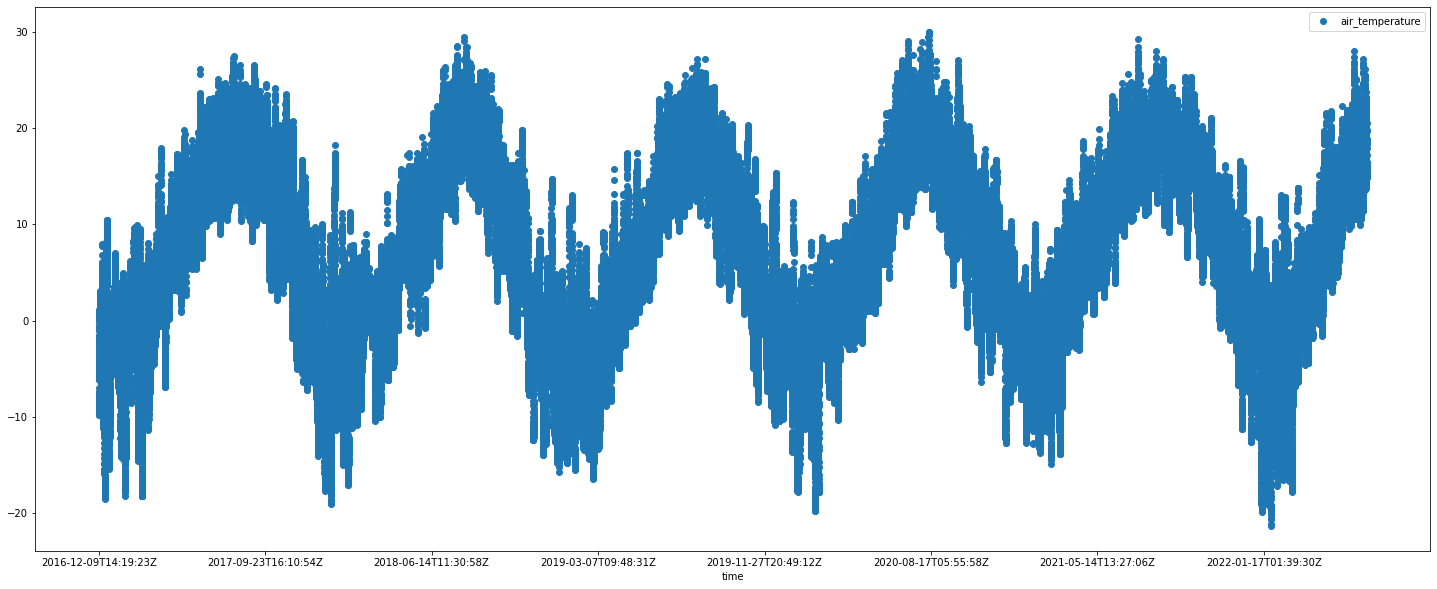

In [6]:
df_csv.plot(x='time', y='air_temperature', linestyle='', marker='o', figsize=(25,10))

### Assess the data for missing values
Check the presence of wind speed (m/s) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.
Note: the missing roughly 6-month period when the wind speed anemometer was down.

<AxesSubplot:title={'center':'Wind Speed'}, xlabel='time', ylabel='m/s'>

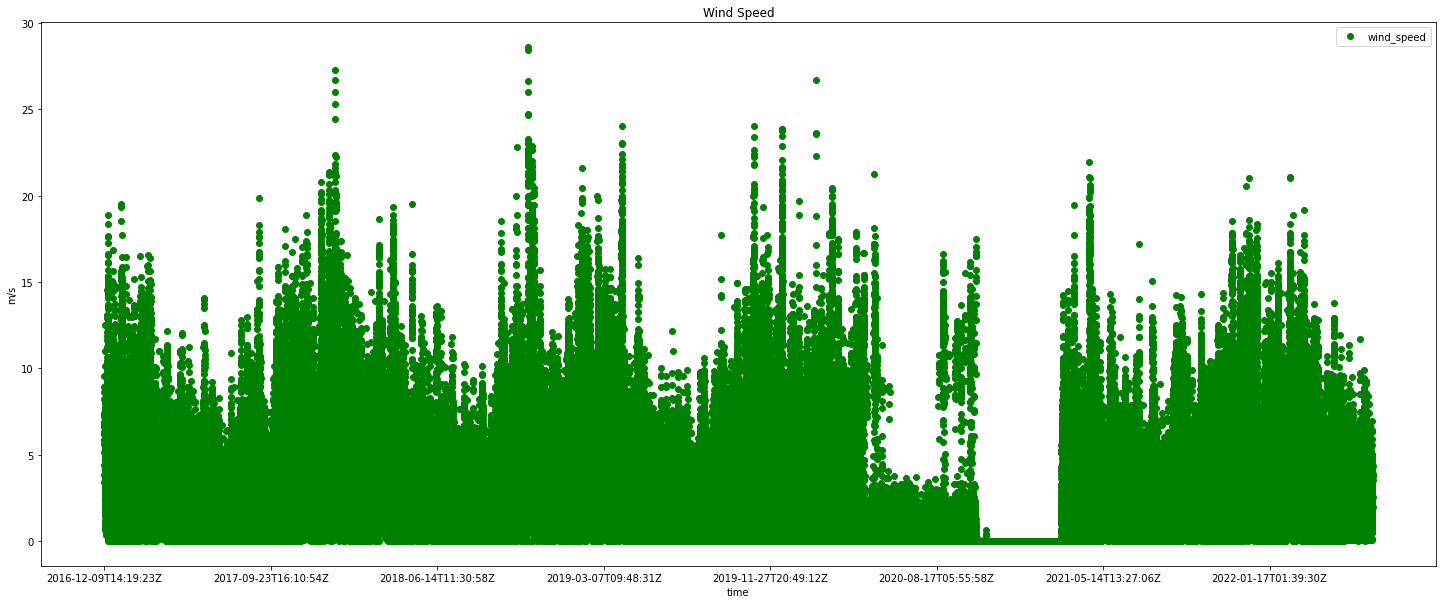

In [7]:
df_csv.plot(x='time', y='wind_speed', ylabel='m/s', title='Wind Speed', linestyle='', color='green', marker='o', figsize=(25,10))

Highlighting the presence of wind speed (m/s) on the y-axis, over time from 2020 August to 2021 April with 15 minute datapoints.

<AxesSubplot:title={'center':'Wind Speed 2021 missing data months but JSON files are still present'}, xlabel='time', ylabel='m/s'>

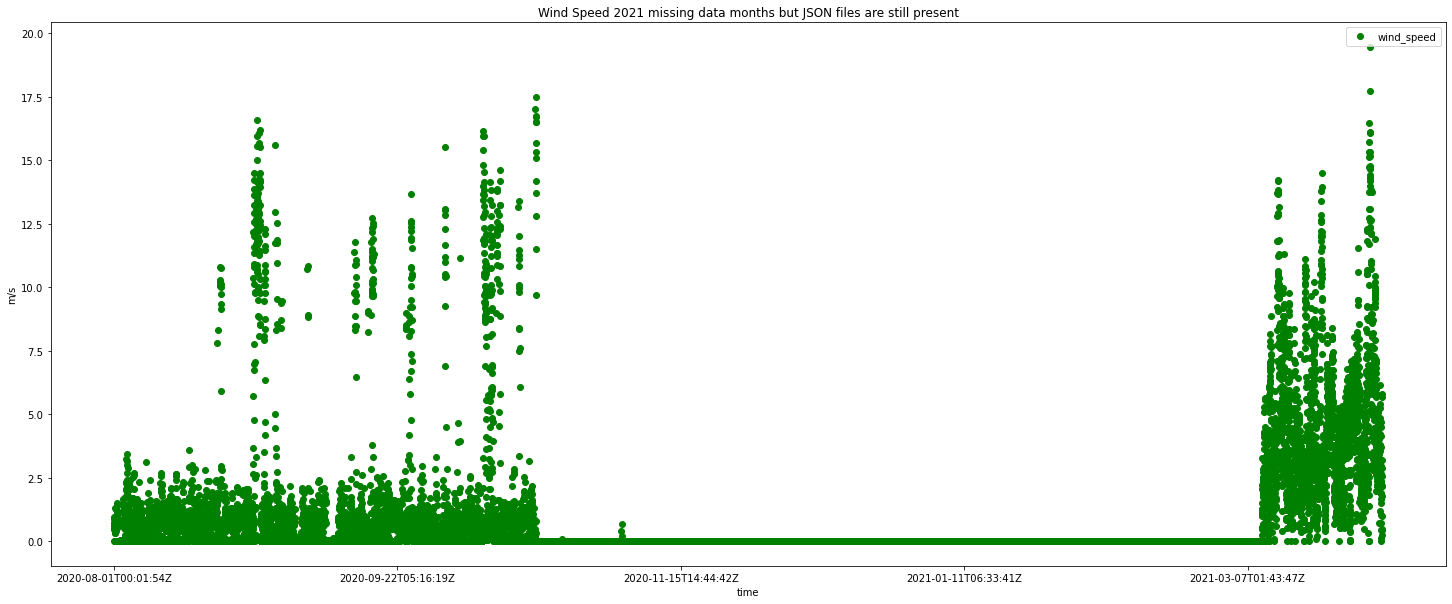

In [8]:
df_csv[(df_csv['time']>="2020-08") & (df_csv['time']<="2021-04")].plot(x='time', y='wind_speed', ylabel='m/s', title='Wind Speed 2021 missing data months but JSON files are still present', linestyle='', color='green', marker='o', figsize=(25,10))

Note that there isn't an obvious visual gap here at first glance, and that is because there were no JSON files, meaning the datapoints are completely missing along with their timestamps. If the data had been empty and still had a JSON it would display here in Jupyter notebooks as a missing chunk.

<AxesSubplot:title={'center':'Air Temperature April 2022 Missing JSON files'}, xlabel='time', ylabel='degree Celsius'>

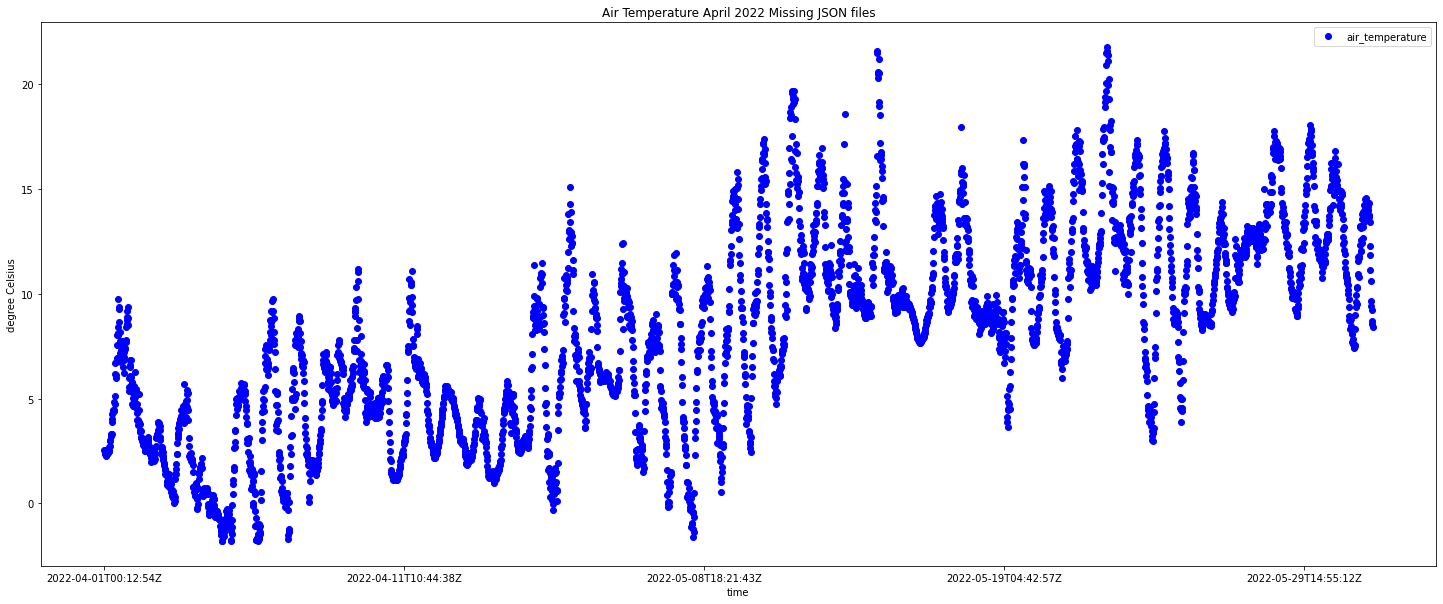

In [9]:
df_csv[(df_csv['time']>="2022-04") & (df_csv['time']<="2022-06")].plot(x='time', y='air_temperature', ylabel='degree Celsius', title='Air Temperature April 2022 Missing JSON files', linestyle='', color='blue', marker='o', figsize=(25,10))

Check the presence of solar irradiance (MJ) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.

<AxesSubplot:title={'center':'solar irradiance'}, xlabel='time', ylabel='MJ/m^2'>

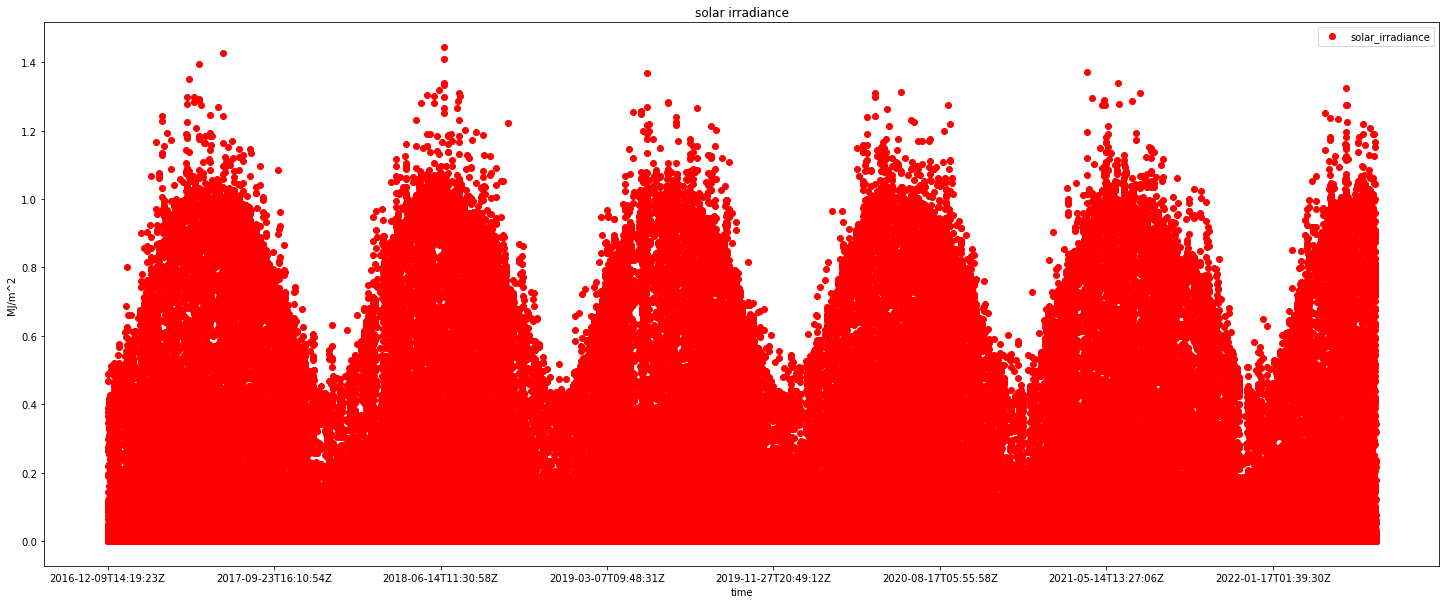

In [10]:
df_csv.plot(x='time', y='solar_irradiance', ylabel='MJ/m^2', title='solar irradiance', linestyle='', color='red', marker='o', figsize=(25,10))

# Missing data JSONs in April ERDDAP plot
![FORCE missing data](./images/force_meteorological_tower_missingJSONs.png)

### Next we automatically check the data for any missing days
This prepares the start and end dates for the next step

In [11]:
df = df_csv['time']
df_time = pd.to_datetime(df)

def date_time_str(time):
    # Needed for rounding day to beginning of month to avoid duplicate appending by mistake
    # time is str and in format of yyyy-mm-dd
    return datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S%z').strftime('%Y-%m-%d')

df_time = df_time.map(lambda x: date_time_str(x))

# Update start and end date of dataset
start_date = str(df_time.iloc[0])
end_date = str(df_time.iloc[-1])

Print the missing JSON dates

In [12]:
print(pd.date_range(start=start_date, end=end_date).difference(df_time))

DatetimeIndex(['2016-12-11', '2016-12-14', '2016-12-15', '2016-12-16',
               '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30', '2016-12-31', '2017-12-05',
               '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11',
               '2020-11-08', '2020-11-25', '2022-04-12', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24', '2022-04-27'],
              dtype='datetime64[ns]', freq=None)


Count the number of missing dates (these dates return a HTTP 404 error)

In [13]:
days = len(pd.date_range(start=start_date, end=end_date).difference(df_time))
print(f'Number of missing dates: {days}')

Number of missing dates: 39


### Check the solar irradiance units are correct
Originally there were three solar irradiance related columns, marked as kW, MJ, and raw. We interpreted this to be equivalent to kW/m2, MJ/m2 as the canonical units/format for irradiance data. To double check that the columns we used were correctly interpreted we double checked with the federal government solar irradiance database/map for the FORCE location, i.e. what is the daily and annual expected solar irradiance for this general location.

In [14]:
df_solar = df_csv.loc[:,('time','solar_irradiance')]
df_solar['time'] = df_solar['time'].astype('datetime64')
df_solar.head()

time  solar_irradiance
0 2016-12-09 14:19:23          0.104737
1 2016-12-09 14:34:23          0.271738
2 2016-12-09 14:49:23          0.195477
3 2016-12-09 15:04:23          0.218138
4 2016-12-09 15:19:23          0.142361

Rebinning to monthly solar irradiance to compare expected monthly values.
Keep in mind that these are instantaneous measurements but generally measured over an hour, so we have to multiply by 1/4 to be able to compare to the standard measures used by the community.

In [15]:
df_solar.groupby([(df_solar.time.dt.year), (df_solar.time.dt.month)])['solar_irradiance'].sum()*0.25

time  time
2016  12        1.484640
2017  1        39.583192
      2        66.124920
      3        99.688894
      4       133.289048
                 ...    
2022  3        93.067818
      4        50.998859
      5       186.308268
      6       175.686527
      7       107.195852
Name: solar_irradiance, Length: 68, dtype: float64

Rebinning to daily solar irradiance to compare expected daily values.

In [16]:
solar_day = df_solar.groupby([(df_solar.time.dt.year), (df_solar.time.dt.month), (df_solar.time.dt.day)])['solar_irradiance'].sum()*0.25
print(solar_day)

time  time  time
2016  12    9       1.251317
            10      0.118633
            12      0.114689
            13      0.000000
2017  1     1       0.010370
                      ...   
2022  7     14      7.125231
            15      5.406867
            16      7.778082
            17      6.899867
            18      0.488138
Name: solar_irradiance, Length: 2009, dtype: float64


In [17]:
solar_day.to_csv("./output/example_solar_day.csv")

What we are looking for here is whether the mean value of solar irradiance matches the government data range of 12-15 MJ/m2 which is the medium green colour which says 800-900 kWh/kW in the top column of the legend (see both map and legend below)

In [18]:
solar_day.describe()*4

count    8036.000000
mean       14.598553
std        10.280979
min        -0.000965
25%         5.785377
50%        12.391870
75%        23.032875
max        49.782026
Name: solar_irradiance, dtype: float64

### Comparing FORCE data with expected range of values
The following is an interactive Photovoltaic Potential and Solar Resource Map of Canada from the Federal government. It shows how many KWh/kW, MJ/m2 are to be expected either annually averaged or on a monthly basis. See the colour legend for what is expected on average for the FORCE Met Tower in the location near Parrsboro, Nova Scotia.
[https://fgp-pgf.maps.arcgis.com/apps/webappviewer/index.html?id=c91106a7d8c446a19dd1909fd93645d3](https://fgp-pgf.maps.arcgis.com/apps/webappviewer/index.html?id=c91106a7d8c446a19dd1909fd93645d3)

### FORCE expected solar irradiance daily insolation
![FORCE expected solar irradiance](./images/force_solarsite.png)

### Solar irradiance legend (from solar map)
![Government map solar irradiance legend](./images/solar_irradiance_legend.png)

These annual values match up with the summations in the daily values as well, and are in the expected range for annual MJ/m2 (keep in mind that is not kWh/kW another common way to represent a solar resource)

In [19]:
df_solar.groupby(df_solar.time.dt.year)['solar_irradiance'].sum()*0.25

time
2016       1.484640
2017    1314.129474
2018    1313.158639
2019    1311.588985
2020    1322.543992
2021    1367.614493
2022     701.603182
Name: solar_irradiance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

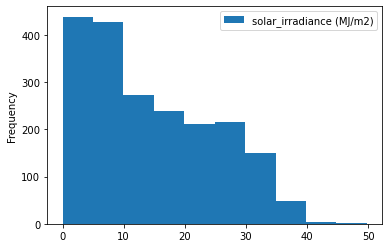

In [20]:
solar_day_hourly = solar_day*4
solar_day_hourly.plot.hist(bins=10, legend=True, label='solar_irradiance (MJ/m2)')

### Conclusion:
The data quality is looking in good shape.

### Note:
We aim to run the qartod qc library on this dataset next to check for any out of range values, such as high wind speeds (outliers), and missing data that has either a datetime, or missing a single 15-minute time chunk.

In [21]:
# Import QC library
from ioos_qc.config import QcConfig
from ioos_qc import qartod

variable_name='wind_speed'

qc_results = qartod.spike_test(
    inp=df_csv[variable_name],
    suspect_threshold=0.8,
    fail_threshold=3
)
print(qc_results)

[2 3 4 ... 1 1 2]


In [22]:
# The configuration object can be initialized using a dictionary or a YAML file. Here is one example:
# QC configuration dictionary for a single test: the spike test
qc_config = {
    'qartod': {
      "spike_test": {
        "suspect_threshold": 26,
        "fail_threshold": 27
      }
    }
}

# Instantiate the configuration object
qc = QcConfig(qc_config)
print(qc)

In [23]:
# run the test
qc_results =  qc.run(
    inp=df_csv[variable_name],
    tinp=df_csv['time']  # can also use 'timestamp'
)
print(qc_results)

defaultdict(<class 'collections.OrderedDict'>, {'qartod': OrderedDict([('spike_test', array([2, 1, 1, ..., 1, 1, 2], dtype=uint8))])})


In [24]:
# These results can be visualized using Bokeh
# https://github.com/ioos/ioos_qc/blob/master/docs/source/examples/Qartod_Single_Test_Example.ipynb

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file, output_notebook
output_notebook()

# Set-up
title = "Wind Speed : FORCE Met Tower, Parrsboro, NS"
time = df_csv['time']
qc_test = qc_results['qartod']['spike_test']

# Create the figure object
p1 = figure(x_axis_type="datetime", title='Spike Test : ' + title)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Time'
p1.yaxis.axis_label = 'Spike Test Result'
p1.line(time, qc_test, color='blue')

# Display it
show(gridplot([[p1]], width=800, height=400))

Loading BokehJS ...